# Python für Archäologen
### Modul-Abschlussprüfung

Ulrich Wölfel (Institut für Archäologie und Kulturanthropologie, Universität Bonn)

Für die Modulabschlussprüfung sind die Aufgaben mit Punkten versehen (insgesamt 20 Punkte). Für das Bestehen der Prüfung sind mindestens 5 Punkte erforderlich (Note 4,0). Es gibt eine Bonusaufgabe, mit der zusätzliche Punkte erreicht werden können.

Viel Erfolg!

## Tape-and-Compass, Vollversion

Wir haben uns in Übungsaufgabe 1 zur Sitzung 5 bereits einmal kurz mit der Vermessung per "Tape-and-Compass" beschäftigt. Wir wollen jetzt das Ganze zu einem vollständigen Programm ausbauen, das uns bei der Verarbeitung von Vermessungsdaten unterstützt.

Die Vermessung (= Generierung der Daten) erfolgt dabei in zwei Schritten (die wir in unserem Programm nachbilden wollen): 

1. Festlegen von **Fixpunkten** (FP), die z.B. mit Stöcken im Gelände markiert werden und dabei ein **Polygon** bilden, das die zu vermessenden Teile der archäologischen Stätte (i.d.R. Gebäude) einschließt. Ausgehend vom ersten Punkt, dessen Koordinaten (in Metern) beliebig festgelegt werden (möglichst so, dass alle resultierenden kartesischen Koordinaten positiv sind), wird zunächst dieses Polygon vermessen. Dabei messen wir immer von einem FP zum nächsten, und zwar *Distanz* und *Orientierung* (Winkel als Abweichung von Nord).

2. Ausgehend von den Fixpunkten messen wir anschließend die Gebäude ein, d.h. von *einem FP* aus werden mehrere Messungen, z.B. von Gebäudeecken, vorgenommen.

Die Rechenarbeit geht los, wenn wir die Daten, die zunächst nur als Polarkoordinaten vorliegen, in kartesische Koordinaten umwandeln. Hier soll unser kleines Python-Programm unterstützen. Dabei ist wichtig, dass wir die Information darüber berücksichtigen, *von welchem Punkt aus gemessen wird*.

Beispieldaten für eine im tiefen Dschungel Mexikos versteckte Maya-Stätte finden Sie in eCampus. Auch einen Screenshot des Endergebnisses finden Sie hier, an dem Sie sich während Ihrer Tests orientieren können.

## Aufgabe 1 (10 Punkte)

Lesen Sie die Excel-Datei mit den Messwerten ("Measurements.xlsx") mittels Pandas in einen Dataframe ein. Schreiben Sie eine Funktion für die Berechnung kartesischer Koordinaten, basierend auf den Koordinaten im Dataframe. Hierbei können Sie die Funktion `polar_to_cartesian()` aus der Aufgabe zu Sitzung 5 verwenden, allerdings sind die Winkel diesmal immer als *Abweichung von der magnetischen Nordrichtung* angegeben (per Kompass gemessen), weshalb Sie vom Winkel 90° abziehen müssen und den errechneten Wert in Radianten mit `-1` multiplizieren müssen.

Überlegen Sie sich eine geeignete Datenstruktur für die kartesischen Koordinaten, die neben dem x- und y-Wert auch den Namen (`ID`) des jeweiligen Punktes angibt. Sie können davon ausgehen, dass jeder gemessene Punkt einen eindeutigen Namen hat. Um über die Zeilen eines Pandas-Dataframes iterieren zu können, gibt es die Methode `iterrows()`. Beachten Sie, dass im Dataframe die Spalte `FROM_POINT` angibt, von welchem Punkt aus gemessen wurde. Die Punkte sind in der korrekten Reihenfolge angegeben, das heisst, angefangen vom ersten Fixpunkt `FP0`, für den Sie fiktive Koordinaten wählen, z.B. wieder `x=500` und `y=600`, erfolgt jede nachfolgende Messung von einem bereits gemessenen Punkt aus (für die Sie in der Schleife bereits die kartesischen Koordinaten berechnet haben werden).

Berechnen Sie die kartesischen Koordinaten zunächst nur für die Punkte des Polygonszugs (Fixpunkte, Namen beginnen mit "FP", Sie können mit der Methode `startswith()` überprüfen, ob ein String mit einem anderen String beginnt). Lassen Sie sich zur Kontrolle den Polygonzug aufplotten (z.B. `plt.plot` aus `matplotlib.pyplot()`).


In [77]:
import pandas as pd
df = pd.read_excel('Measurements.xlsx')

from math import sin, cos, radians
import matplotlib.pyplot as plt

# FP0
#Der erste Fixpunkt aus der Liste FP0 ist fiktiv. Damit alle Werte Positiv bleiben wird er bei 500 , 600 gesetzt. 
current_x = 500
current_y = 600
Fix_coords = [(current_x, current_y)]

#Dieser DataFrame enthält jetzt nur die Fixpunkte
fixpoints = df[df['ID'].str.contains('FP')]


def polar_to_cartesian(angle, dist):
    return dist * cos(radians(angle-90)*(-1)), dist * sin(radians(angle-90)*(-1))

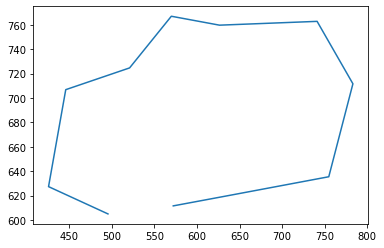

In [78]:
coords = []

for i,measurement in fixpoints.iterrows():
    x, y = polar_to_cartesian(measurement.ANGLE, measurement.DISTANCE)
    current_x += x
    current_y += y
    coords.append((current_x, current_y))

df_plot = pd.concat([fixpoints, pd.DataFrame(coords, columns=['x', 'y'])], axis = 1)
# print(df_plot.head())


plt.plot(*zip(*coords))
plt.show()

## Aufgabe 2 (5 Punkte)

Berechnen Sie den Fehler $F$ bei der Vermessung des Polygonzugs (Differenz zwischen `FP0` und `FP0_CORR`) und verteilen Sie diesen auf die einzelnen Punkte des Polygonzugs. Beachten Sie, dass bei `n` Messungen der erste Messwert (`FP0` ist *kein* Messwert) $\frac{1}{n} \cdot F$, der zweite Messwert $\frac{2}{n} \cdot F$ usw. erhält. 

Nachdem Sie den Fehler verteilt haben, können Sie die Koordinaten für alle übrigen Punkte (deren Namen mit "P" beginnen) berechnen. Lassen Sie sich zur Kontrolle die übrigen Punkte aufplotten (z.B. `plt.scatter()` aus `matplotlib.pyplot`).

In [79]:
x_error = df_plot.iloc[0].x - df_plot.iloc[10].x
y_error = df_plot.iloc[0].y - df_plot.iloc[10].y

print(x_error, y_error)

76.69513904307098 6.593457848817707


In [80]:
import numpy as np

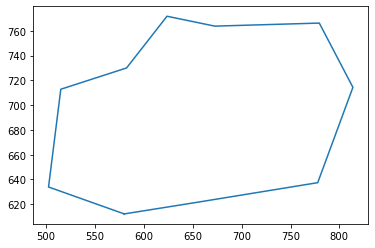

In [81]:
df_plot['x_error'] = (np.arange(1,12)/10)*x_error
df_plot['y_error'] = (np.arange(1,12)/10)*y_error

df_plot['x_corr'] = df_plot.x + df_plot.x_error
df_plot['y_corr'] = df_plot.y + df_plot.y_error

plt.plot(df_plot.x_corr, df_plot.y_corr)

In [84]:
fixpoints.set_index('ID', inplace=True)
df_plot.set_index('ID', inplace=True)

df_plot

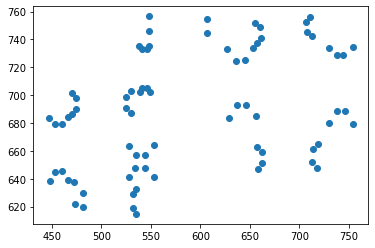

In [87]:
df_plot.loc['FP0','x'] = 500
df_plot.loc['FP0','y'] = 600

p_points = df[df['ID'].str.startswith('P')]

coords = []

for i,measurement in p_points.iterrows():
    x, y = polar_to_cartesian(measurement.ANGLE, measurement.DISTANCE)
    fixpoint = df_plot.loc[measurement.FROM_POINT]
    
    x += fixpoint.x
    y += fixpoint.y
    
    coords.append((x, y))

plt.scatter(*zip(*coords))
plt.show()

## Aufgabe 3 (5 Punkte)

Lesen Sie jetzt die Textdatei mit den Informationen zu den Linien für die Gebäude ein. Hierfür können Sie mit `open()` die Datei zum Lesen öffnen, in einer `for`-Schleife können Sie über die Zeilen der Datei iterieren und mit `split()` trennen Sie die Zeilen an den Leerzeichen in einzelne Strings auf (`split()` liefert eine Liste). Plotten Sie die einzelnen Linien.

In [113]:
x = [i[0] for i in coords]
y = [i[1] for i in coords]

p_points['x'] = x
p_points['y'] = y

p_points_idx = p_points.set_index('ID')
p_points_idx.head()

C:\Users\Philipp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Philipp\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,FROM_POINT,ANGLE,DISTANCE,x,y
ID,,,,,
P1,FP3,331.21,50.92,730.281334,680.073713
P2,FP3,358.85,43.94,753.922570,679.379045
P3,FP3,350.01,53.97,745.441927,688.599605
P4,FP3,342.32,56.04,737.785067,688.840989
P5,FP3,291.85,44.92,713.111433,652.166129


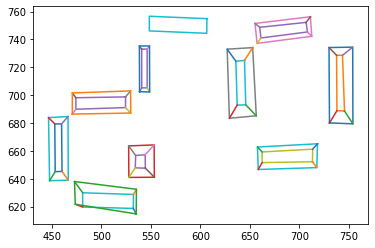

In [122]:
with open("lines.txt", "r") as f:
    for l in f:
        sub_coord = l.split()
        plt.plot(p_points_idx.loc[sub_coord,].x, p_points_idx.loc[sub_coord,].y)

## Aufgabe 4 [Bonus-Aufgabe] (8 Punkte)

Wir wollen abschließend die Vermessungsdaten in unser Geoinformationssystem laden. Dazu müssen wir 

1.  QGIS-Vektorobjekte anlegen, einmal für die Punkte und einmal für die Linien und
2.  unsere in unserem fiktiven Koordinatensystem gemessenen Objekte zu georeferenzieren, wobei wir auf (z.B. per GPS gemessene) Koordinaten in einem globalen Koordinatensystem zurückgreifen.

Das verwendete Koordinatenbezugssystem ist UTM (Universal Transverse Mercator, ein projiziertes KBS, das in Einheiten von Metern misst und damit gut zu unseren Messdaten passt), das Datum ist dasselbe wie bei unserem Lat/Lon, WGS84, die UTM-Zone ist 15N, entsprechend lautet der EPSG-Code 32615. Diesen können wir bei der Erzeugung der Layer mit der Option `"crs=epsg:32615"` angeben.

Für die Georeferenzierung können wir auf die Processing-Toolbox von QGIS zurückgreifen (siehe Sitzung 8!). Die Funktion, die wir verwenden können, heisst `"gdal:convertformat"`. Sie erhält drei Parameter:

*  `'INPUT'`: der Input-Layer, hier können wir einfach die im vorigen Schritt erstellten Layer verwenden,
*  `'OPTIONS'`: ein String, der verschiedene Optionen angibt, wir übergeben zum einen die GCPs (Ground-Control-Points), und zwar wie folgt: jeder GCP wird mit `-gcp` "angekündigt", gefolgt von den Koordinaten für die Fixpunkte, zuerst die ungeoreferenzierten (x und y), danach die GPS-Koordinaten (x und y); außerdem geben wir durch die Option `-order 1` an, dass wir eine lineare Transformation für die Koordinaten wünschen; alle diese Optionen werden als ein String übergeben,
*  `'OUTPUT'`: der Output-Layer, hier können wir zum Testen einfach `'TEMPORARY_OUTPUT'` verwenden, um ein Memory-Layer anzulegen.

Die GCPs liegen bereits als Python-Dictionary vor (und sind auch schon ins richtige Koordinatensystem umgewandelt):

In [ ]:
GCPs <- {
    'FP0_GPS': (699673.987372798, 1832081.754286769),
    'FP1_GPS': (699746.5636115011, 1832093.0375018292),
    'FP2_GPS': (699812.2266256256, 1832101.2375985382),
    'FP3_GPS': (699929.8190355556, 1832116.1149446527),
    'FP4_GPS': (699958.6972473218, 1832191.9985344461),
    'FP5_GPS': (699917.4051545678, 1832242.565910711),
    'FP6_GPS': (699803.0148509502, 1832239.2269035613),
    'FP7_GPS': (699746.9893744275, 1832246.0152288144),
    'FP8_GPS': (699697.909657635, 1832203.011353895),
    'FP9_GPS': (699623.5765434161, 1832184.9289938512),
    'FP10_GPS': (699604.005306184, 1832104.601035179)
}